### Installing necessary packages & import them

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report

### Import all data set

In [3]:
print("Importing Dataset...")

fault_free_training_dataset = pd.read_csv("TEP_FaultFree_Training.csv")
fault_free_testing_dataset = pd.read_csv("TEP_FaultFree_Testing.csv")
faulty_training_dataset = pd.read_csv("TEP_Faulty_Training.csv")
faulty_testing_dataset = pd.read_csv("TEP_Faulty_Testing.csv")

print("Dataset set")

Importing Dataset...
Dataset set


### Get a overview of data

In [6]:
faulty_training_dataset.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [7]:
faulty_testing_dataset.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [8]:
fault_free_training_dataset.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [9]:
fault_free_testing_dataset.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


### Normalise the rows in which variables are there

In [4]:
print("Normalizing dataset...")

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Function to normalize DataFrame
def normalize_dataset(df):
    # Identify columns to normalize (all except the first three)
    columns_to_normalize = df.columns[3:]
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

# Normalize all datasets
faulty_training_dataset = normalize_dataset(faulty_training_dataset)
faulty_testing_dataset = normalize_dataset(faulty_testing_dataset)
fault_free_training_dataset = normalize_dataset(fault_free_training_dataset)
fault_free_testing_dataset = normalize_dataset(fault_free_testing_dataset)

# Print confirmation
print("All datasets normalized successfully!")

Normalizing dataset...
All datasets normalized successfully!


### Calculate and Plot the correlation matrix

In [11]:
print("Correlation matrix calculating...")

correlation_matrix_faulty_training_dataset = faulty_training_dataset.iloc[:, 3:].corr()
correlation_matrix_faulty_testing_dataset = faulty_testing_dataset.iloc[:, 3:].corr()
correlation_matrix_fault_free_training_dataset = fault_free_training_dataset.iloc[:, 3:].corr()
correlation_matrix_fault_free_testing_dataset = fault_free_testing_dataset.iloc[:, 3:].corr()

print("All correlation matrix calculated")

Correlation matrix calculating...
All correlation matrix calculated


<Axes: >

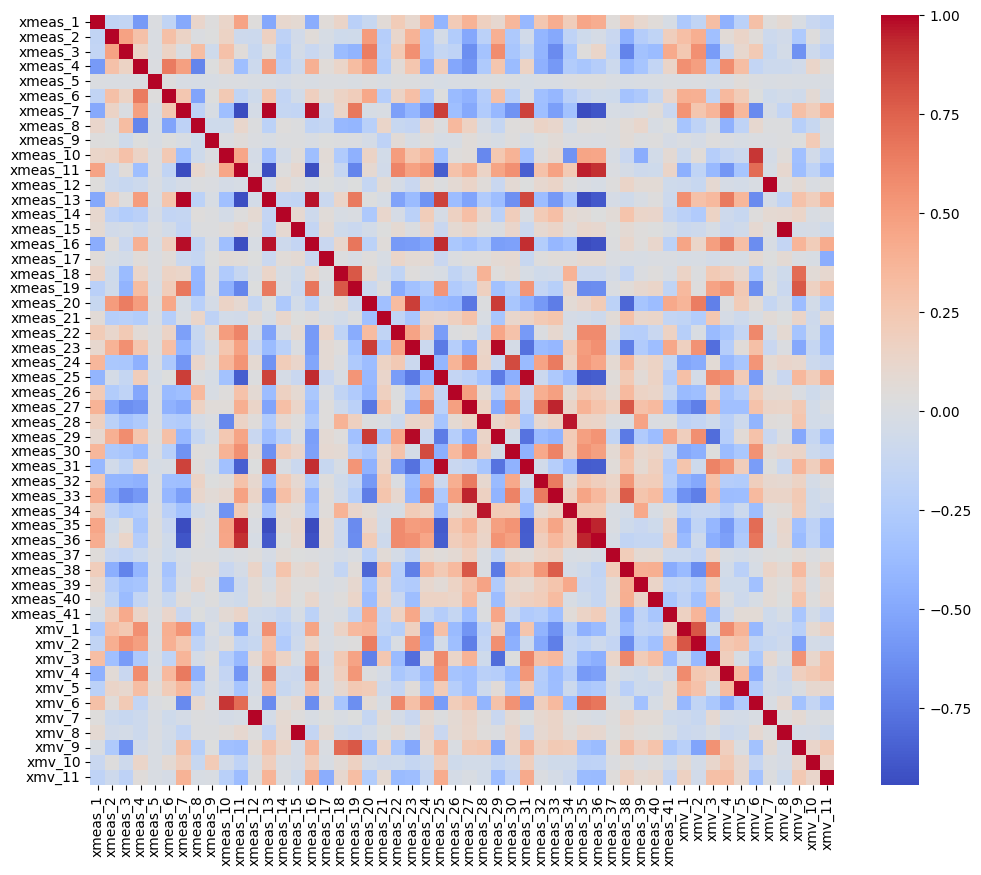

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_faulty_training_dataset, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)

<Axes: >

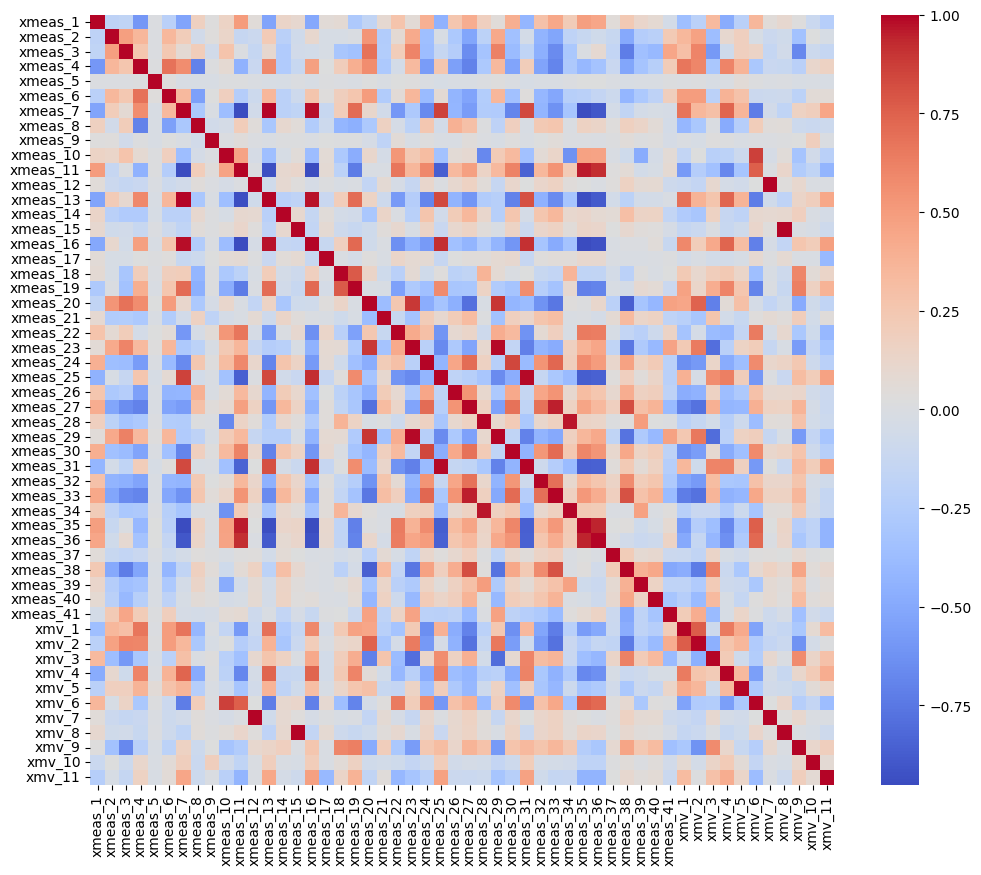

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_faulty_testing_dataset, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)

<Axes: >

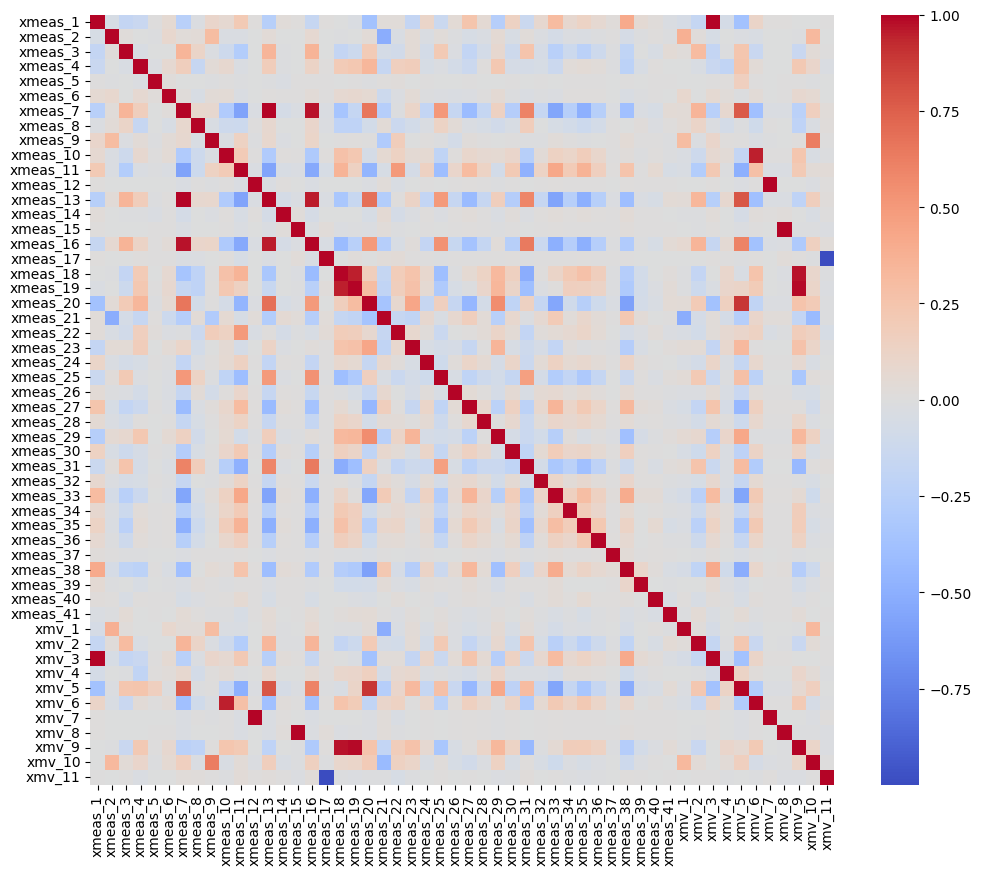

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_fault_free_training_dataset, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)

<Axes: >

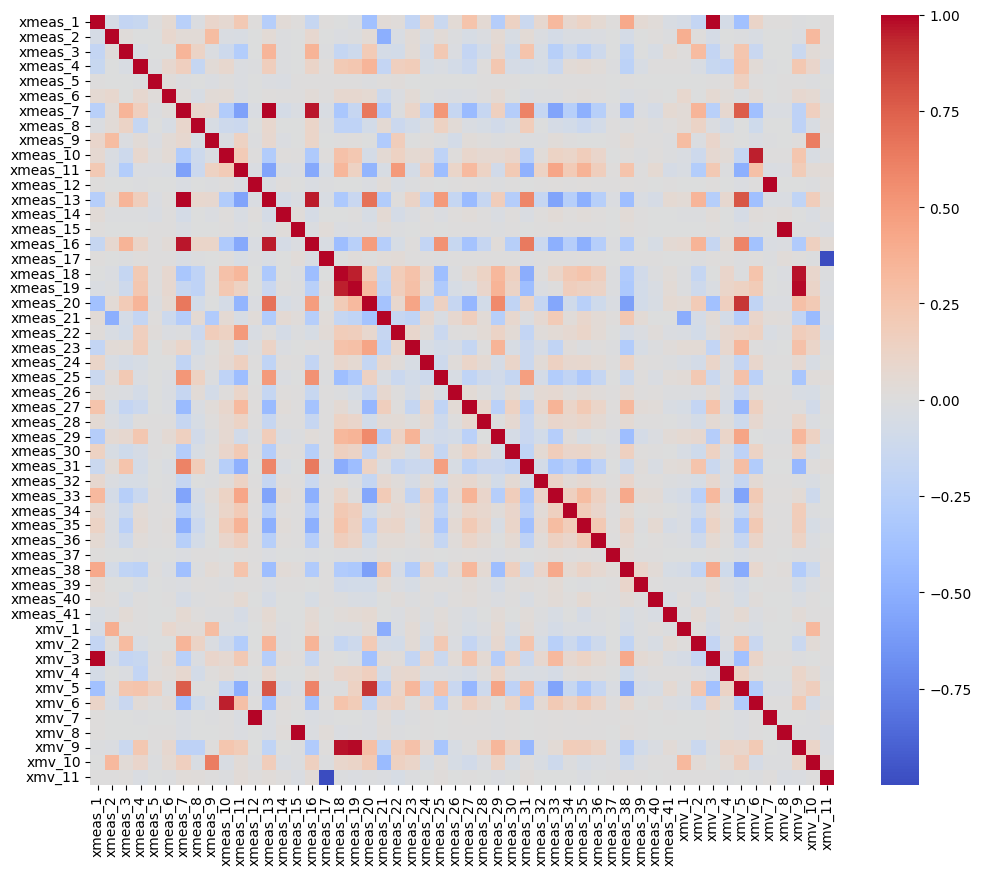

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_fault_free_testing_dataset, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)

### Coverting all fault numbers of faulty dataset to 1


In [5]:
faulty_training_dataset.iloc[:, 0] = 1
faulty_testing_dataset.iloc[:, 0] = 1

### Training a neural network model

In [6]:
print("Combining Data...")

# Combine the two datasets
train_data = pd.concat([faulty_training_dataset, fault_free_training_dataset])

# Separate the features (columns 4 to 55) and target (faultNumber)
x = train_data.iloc[:, 3:].values  # All rows, columns 4 to 55 (features)
y = train_data['faultNumber'].values  # Fault number is in the first column

# Normalize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data combined, Splitted and Scaled.")

Combining Data...
Data combined, Splitted and Scaled.


In [7]:
# Make model
model = Sequential([
        InputLayer(input_shape=(52,)), 
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')  # 21 output classes
    ])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model.save('model_b_neural.keras') 

C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 191s 1ms/step - accuracy: 0.9998 - loss: 9.7737e-04 - val_accuracy: 1.0000 - val_loss: 4.0895e-07
Epoch 2/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 157s 1ms/step - accuracy: 1.0000 - loss: 2.5079e-06 - val_accuracy: 1.0000 - val_loss: 6.1867e-05
Epoch 3/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 157s 1ms/step - accuracy: 1.0000 - loss: 3.2802e-06 - val_accuracy: 1.0000 - val_loss: 1.1353e-13
Epoch 4/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 155s 1ms/step - accuracy: 1.0000 - loss: 1.8069e-06 - val_accuracy: 1.0000 - val_loss: 7.5551e-06
Epoch 5/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 154s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 7.5543e-06
Epoch 6/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 152s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 7.5535e-06
Epoch 7/10
131250/131250 ━━━━━━━━━━━━━━━━━━━━ 152s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 7.5

### Load the trained model

In [8]:
model = load_model('model_b_neural.keras')

### Running validation 

In [9]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

# Predict on the validation set
y_pred = model.predict(X_val)
predicted_classes = np.argmax(y_pred, axis=1)

# Print classification results
print(classification_report(y_val, predicted_classes))

32813/32813 ━━━━━━━━━━━━━━━━━━━━ 29s 870us/step - accuracy: 1.0000 - loss: 1.4576e-05
Validation Loss: 7.550293958047405e-06
Validation Accuracy: 0.9999990463256836
32813/32813 ━━━━━━━━━━━━━━━━━━━━ 30s 898us/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50063
         1.0       1.00      1.00      1.00    999937

    accuracy                           1.00   1050000
   macro avg       1.00      1.00      1.00   1050000
weighted avg       1.00      1.00      1.00   1050000



## Evaluating Data against Testing Data Set

### On Faulty Testing Dataset

In [10]:
X_faulty_test = faulty_testing_dataset.iloc[:, 3:].values
y_faulty_test = faulty_testing_dataset['faultNumber'].values

# Normalize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_test_faulty_scaled = scaler.fit_transform(X_faulty_test)

loss, accuracy = model.evaluate(X_test_faulty_scaled, y_faulty_test)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Make predictions using the trained model
y_pred = model.predict(X_test_faulty_scaled)
predicted_classes = np.argmax(y_pred, axis=1)  # Get the fault number with the highest probability

print("Classification Report - Faulty Testing Dataset:")
print(classification_report(y_faulty_test, predicted_classes))

300000/300000 ━━━━━━━━━━━━━━━━━━━━ 262s 873us/step - accuracy: 1.0000 - loss: 3.8612e-04
Validation Loss: 0.0015231742290779948
Validation Accuracy: 0.9999456405639648
300000/300000 ━━━━━━━━━━━━━━━━━━━━ 265s 885us/step
Classification Report - Faulty Testing Dataset:


C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00   9600000

    accuracy                           1.00   9600000
   macro avg       0.50      0.50      0.50   9600000
weighted avg       1.00      1.00      1.00   9600000



C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### On Fault Free Testing Dataset

In [11]:
X_faulty_free_test = fault_free_testing_dataset.iloc[:, 3:].values
y_faulty_free_test = fault_free_testing_dataset["faultNumber"].values

# Normalise the features
scaler = StandardScaler()
X_test_fault_free_scaled = scaler.fit_transform(X_faulty_free_test)

loss, accuracy = model.evaluate(X_test_fault_free_scaled, y_faulty_free_test)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Make predictions using the trained model
y_pred = model.predict(X_test_fault_free_scaled)
predicted_classes = np.argmax(y_pred, axis=1)  # Get the fault number with the highest probability

print("Classification Report - Fault Free Testing Dataset:")
print(classification_report(y_faulty_free_test, predicted_classes))

15000/15000 ━━━━━━━━━━━━━━━━━━━━ 13s 862us/step - accuracy: 0.0284 - loss: 119.1697
Validation Loss: 119.32716369628906
Validation Accuracy: 0.028435416519641876
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 14s 899us/step
Classification Report - Fault Free Testing Dataset:


C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.03      0.06    480000
           1       0.00      0.00      0.00         0

    accuracy                           0.03    480000
   macro avg       0.50      0.01      0.03    480000
weighted avg       1.00      0.03      0.06    480000



C:\Users\Dr Nabil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
